<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/vitalfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vital 파일 다루기
Vital Recorder 에서 생성한 Vital 파일을 파이선으로 읽어오는 방법을 알아보겠습니다.

## 샘플 vital 파일 다운로드
아래 코드를 실행하여 vitaldb 의 샘플 vital 파일을 다운로드 합니다.

In [2]:
!wget -N https://vitaldb.net/samples/00001.vital

--2021-08-27 11:48:39--  https://vitaldb.net/samples/00001.vital
Resolving vitaldb.net (vitaldb.net)... 3.36.161.141, 3.37.69.87
Connecting to vitaldb.net (vitaldb.net)|3.36.161.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21369609 (20M) [application/octet-stream]
Saving to: ‘00001.vital’

00001.vital         100%[===================>]  20.38M  9.73MB/s    in 2.1s    

2021-08-27 11:48:42 (9.73 MB/s) - ‘00001.vital’ saved [21369609/21369609]



## Vital 파일을 읽기 위한 라이브러리 다운로드

github에 공개된 vitaldb 라이브러리를 이용합니다.

In [1]:
!pip install vitaldb

vitaldb 라이브러리에서 vital 파일을 읽기 위한 utils 모듈을 import 합니다.

In [2]:
import vitaldb.utils

## Vital 파일 트랙 목록 읽기
vital_trks 함수를 사용하여 개인이 보유한 vital 파일을 내용을 읽습니다. 본 웹사이트에서 1.vital 파일을 다운로드 하여 읽어보겠습니다.

In [13]:
trks = vitaldb.utils.vital_trks('https://vitaldb.net/1.vital')
trks

['/EVENT',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar 8000M/HR',
 'Solar 8000M/ST_I',
 'Solar 8000M/ST_II',
 'Solar 8000M/ST_III',
 'Solar 8000M/ST_AVL',
 'Solar 8000M/ST_AVR',
 'Solar 8000M/ST_AVF',
 'Solar 8000M/ART_MBP',
 'Solar 8000M/ART_SBP',
 'Solar 8000M/ART_DBP',
 'Solar 8000M/PLETH_SPO2',
 'Solar 8000M/PLETH_HR',
 'Solar 8000M/BT',
 'Solar 8000M/VENT_MAWP',
 'Solar 8000M/ST_V5',
 'Solar 8000M/NIBP_MBP',
 'Solar 8000M/NIBP_SBP',
 'Solar 8000M/NIBP_DBP',
 'Solar 8000M/VENT_PIP',
 'Solar 8000M/VENT_RR',
 'Solar 8000M/VENT_MV',
 'Solar 8000M/VENT_TV',
 'Solar 8000M/VENT_PPLAT',
 'Solar 8000M/GAS2_AGENT',
 'Solar 8000M/GAS2_EXPIRED',
 'Solar 8000M/GAS2_INSPIRED',
 'Solar 8000M/ETCO2',
 'Solar 8000M/INCO2',
 'Solar 8000M/RR_CO2',
 'Solar 8000M/FEO2',
 'Solar 8000M/FIO2',
 'Solar 8000M/VENT_INSP_TM',
 'Solar 8000M/VENT_SET_TV',
 'Solar 8000M/VENT_SET_PCP',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Pr

## Vital 파일 내용 읽기
vital_recs 함수를 사용하여 개인이 보유한 vital 파일을 내용을 읽습니다. 본 예제에서는 웹사이트로부터 샘플 파일을 다운로드하여 읽어보겠습니다.

어떤 트랙을 읽을지, 한 행은 몇 초 간격으로 읽을지를 지정해야합니다. 트랙 목록을 지정할 때는 `장비명1/트랙명1,장비명2/트랙명2` 형태로 합니다.

In [64]:
vals = vitaldb.utils.vital_recs("https://vitaldb.net/samples/00001.vital", 'ECG_II,ART', 1/100)
vals

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       ...,
       [ -0.28558824, -12.75951172],
       [  0.16864199,  30.68859766],
       [  0.38588254, -16.70933984]])

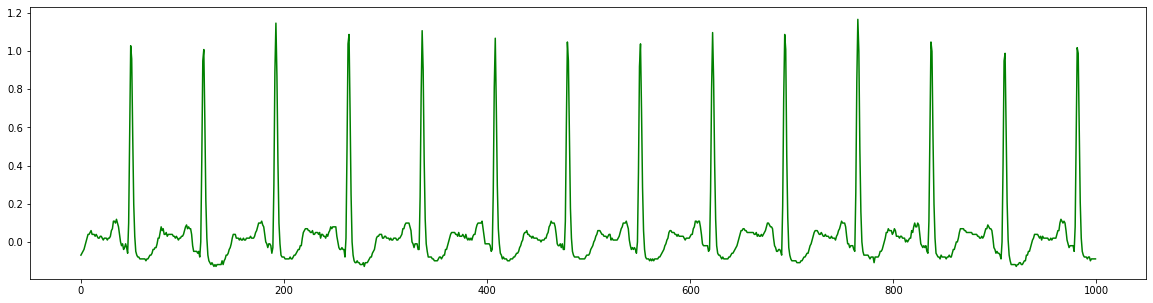

In [80]:
import matplotlib.pyplot as plt

# ecg 트랙을 그림
ecg = vals[:,0]
plt.figure(figsize=(20,5))
plt.plot(ecg[110000:111000], color='g')
plt.show()

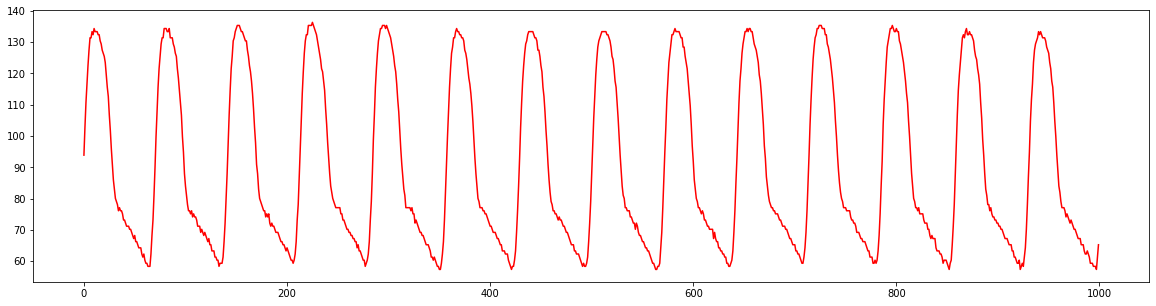

In [79]:
# 동맥압 파형을 그림
art = vals[:,1]
plt.figure(figsize=(20,5))
plt.plot(art[110000:111000], color='r')
plt.show()

# 생체 신호 처리 모듈의 이용

In [23]:
!wget -N https://raw.githubusercontent.com/vitaldb/pyvital/master/arr.py
import arr

--2021-08-27 12:14:07--  https://raw.githubusercontent.com/vitaldb/pyvital/master/arr.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22303 (22K) [text/plain]
Saving to: ‘arr.py’

arr.py              100%[===================>]  21.78K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2021-08-27 12:14:07 (26.8 MB/s) - ‘arr.py’ saved [22303/22303]



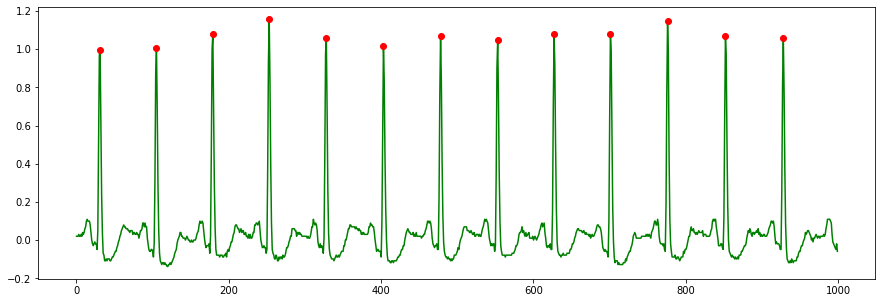

In [85]:
ecg = vals[120000:121000, 0]
ecg = arr.exclude_undefined(ecg)
peaks = arr.detect_qrs(ecg, 100)

plt.figure(figsize=(15,5))
plt.plot(ecg, color='g')
plt.plot(peaks, [ecg[i] for i in peaks], 'ro')
plt.show()

[[117, 192, 264, 342, 417, 492, 567, 641, 713, 791, 865, 942], [61, 136, 213, 286, 360, 435, 511, 586, 659, 734, 808, 885, 962]]


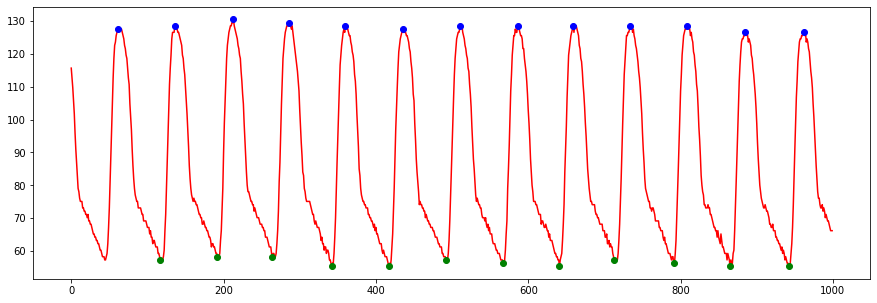

In [84]:
art = vals[120000:121000, 1]
art = arr.exclude_undefined(art)
peaks = arr.detect_peaks(art, 100)
print(peaks)

plt.figure(figsize=(15,5))
plt.plot(art, color='r')
plt.plot(peaks[0], [art[i] for i in peaks[0]], 'go')
plt.plot(peaks[1], [art[i] for i in peaks[1]], 'bo')
plt.show()

# Vital 파일을 읽어 필터를 적용하기
vital recorder 에서 사용하는 필터 함수를 적용해 봅시다. 본 예제에서는 상기 동맥압 파형을 이용하여 PPV를 구해보겠습니다.

모든 필터는 오픈 소스로 https://github.com/vitaldb/pyvital 에 공개 되어 있습니다.

먼저 아래 코드를 실행하여 pyvital 코드 중 PPV 계산을 위한 abp_ppv 모듈을 다운로드 합니다.

In [86]:
!wget -N https://raw.githubusercontent.com/vitaldb/pyvital/master/abp_ppv.py
import abp_ppv

--2021-08-27 12:34:52--  https://raw.githubusercontent.com/vitaldb/pyvital/master/abp_ppv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5541 (5.4K) [text/plain]
Saving to: ‘abp_ppv.py’

abp_ppv.py          100%[===================>]   5.41K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2021-08-27 12:34:52 (65.8 MB/s) - ‘abp_ppv.py’ saved [5541/5541]



모든 필터는 cfg 라는 이름의 프로퍼티가 있습니다. 여기에는 입력값, 출력값에 대한 정의 및 reference 등이 있습니다. 우선, 그것부터 확인해 봅시다.

In [87]:
abp_ppv.cfg

{'desc': 'Calculate pulse pressure variation using modified version of the method in the reference',
 'group': 'ABP',
 'inputs': [{'name': 'ART', 'type': 'wav'}],
 'interval': 30,
 'name': 'Pulse Pressure Variation',
 'outputs': [{'max': 30, 'min': 0, 'name': 'PPV', 'type': 'num', 'unit': '%'},
  {'max': 30, 'min': 0, 'name': 'SPV', 'type': 'num', 'unit': '%'},
  {'max': 30, 'min': 0, 'name': 'ART_RR', 'type': 'num', 'unit': '/min'}],
 'overlap': 20,
 'reference': 'Aboy et al, An Enhanced Automatic Algorithm for Estimation of Respiratory Variations in Arterial Pulse Pressure During Regions of Abrupt Hemodynamic Changes. IEEE TRANSACTIONS ON BIOMEDICAL ENGINEERING, VOL. 56, NO. 10, OCTOBER 2009'}

동맥압을 100Hz로 읽어 PPV 필터를 적용해 봅시다. 필터 모듈의 run 함수를 호출하면 됩니다.

In [91]:
art = vals[300000:306000, 1]

res = abp_ppv.run({'ART':{'srate':100, 'vals':art}}, {}, abp_ppv.cfg)
print(res[0])

[{'dt': 30, 'val': 3.5636589661246116}]
